# Data Import

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv(r'D:\Shubham\Datasets\Fraud Detection Dataset.csv')
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


# Data Cleaning

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [41]:
for column in df.columns:
    print(column)

Transaction_ID
User_ID
Transaction_Amount
Transaction_Type
Time_of_Transaction
Device_Used
Location
Previous_Fraudulent_Transactions
Account_Age
Number_of_Transactions_Last_24H
Payment_Method
Fraudulent


In [42]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [43]:
df = df.isnull().sum()
df

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [46]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(df['Transaction_Amount'].median())
df['Time_of_Transaction'] = df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].mode()[0])
df['Device_Used'] = df['Device_Used'].bfill().ffill()
df['Location'] = df['Location'].bfill().ffill()
df['Payment_Method'] = df['Payment_Method'].bfill().ffill()


In [47]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [48]:
columns=['Payment_Method','Transaction_Type','Device_Used', 'Location']
for column in columns:
    print(column,df[column].unique())

Payment_Method ['Debit Card' 'Credit Card' 'UPI' 'Net Banking' 'Invalid Method']
Transaction_Type ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Device_Used ['Tablet' 'Mobile' 'Desktop' 'Unknown Device']
Location ['San Francisco' 'New York' 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']


# KPI

In [49]:
total_txn_amt = df['Transaction_Amount'].sum()
print("Total Transaction Amount : ",total_txn_amt)

Total Transaction Amount :  151618921.55


In [50]:
avg_time_of_txn = df["Time_of_Transaction"].mean()
print("Average Time of Transaction : ",avg_time_of_txn)

Average Time of Transaction :  11.814235294117648


In [51]:
most_device_used = df["Device_Used"].mode()[0]  # Mode gives the most frequent value
print("Most Device Used : ",most_device_used)

Most Device Used :  Desktop


In [52]:
avg_previous_fraudulent_txn = df["Previous_Fraudulent_Transactions"].mean()
print("Average Fraudulent Transations:",avg_previous_fraudulent_txn)

Average Fraudulent Transations: 1.9957254901960784


In [53]:
avg_account_age = df["Account_Age"].mean()
print("Average Account Age :",avg_account_age)

Average Account Age : 60.03390196078431


In [54]:
# Check fraud distribution
fraud_counts = df["Fraudulent"].value_counts()  # Get counts of fraudulent and non-fraudulent cases
non_fraudulent_count = fraud_counts.get(0, 0) 
fraudulent_count = fraud_counts.get(1, 0)
print(f"Total Non-Fraudulent Cases: {non_fraudulent_count}")
print(f"Total Fraudulent Cases: {fraudulent_count}")

Total Non-Fraudulent Cases: 48490
Total Fraudulent Cases: 2510


In [55]:
most_fraudulent_locations = df[df["Fraudulent"] == 1]["Location"].value_counts().idxmax()
print("Most Fraudulent Location :",most_fraudulent_locations)

Most Fraudulent Location : Chicago


# Data Visualization

C:\Users\Priyanka Bhoite\AppData\Local\Temp\ipykernel_22152\3424207686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Fraudulent', data=df, palette=my_colors)
C:\Users\Priyanka Bhoite\AppData\Local\Temp\ipykernel_22152\3424207686.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])


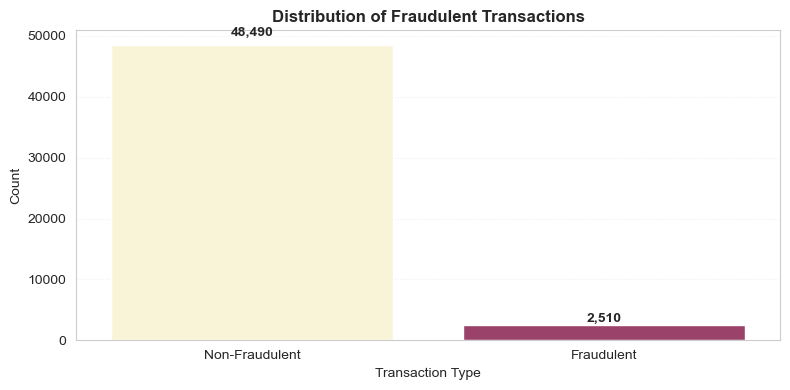

In [56]:
# Setup styling
sns.set_style("whitegrid", {"grid.color": "#f0f0f0", "grid.linestyle": ":"})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 10

# Define a custom color palette
my_colors = ["#FFF8D2", "#AA336A"] 

# Create a centered figure layout
plt.figure(figsize=(8, 4))

# Distribution of the target variable (Fraudulent)
ax = sns.countplot(x='Fraudulent', data=df, palette=my_colors)

# --- Code to add counts on top of the bars ---
for p in ax.patches:
    # Format the height as an integer with comma as thousands separator
    height = int(p.get_height())
    formatted_height = f'{height:,}'
    
    # Calculate text position
    x_pos = p.get_x() + p.get_width() / 2.
    # Adjust y-position: slightly above the bar. 
    # Use 2% of the bar height for large bars, and a fixed small offset for small bars.
    y_pos = height + (height * 0.02 if height > 1000 else 10) 

    # Annotate the bar with the formatted count
    ax.text(
        x_pos,
        y_pos,
        formatted_height,
        ha='center', # Horizontal alignment
        va='bottom', # Vertical alignment
        fontsize=10,
        weight='bold'
    )
# ----------------------------------------------

ax.set_title("Distribution of Fraudulent Transactions", size=12, weight="bold")
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")

plt.tight_layout()

Text(0.5, 0, 'Transaction Amount')

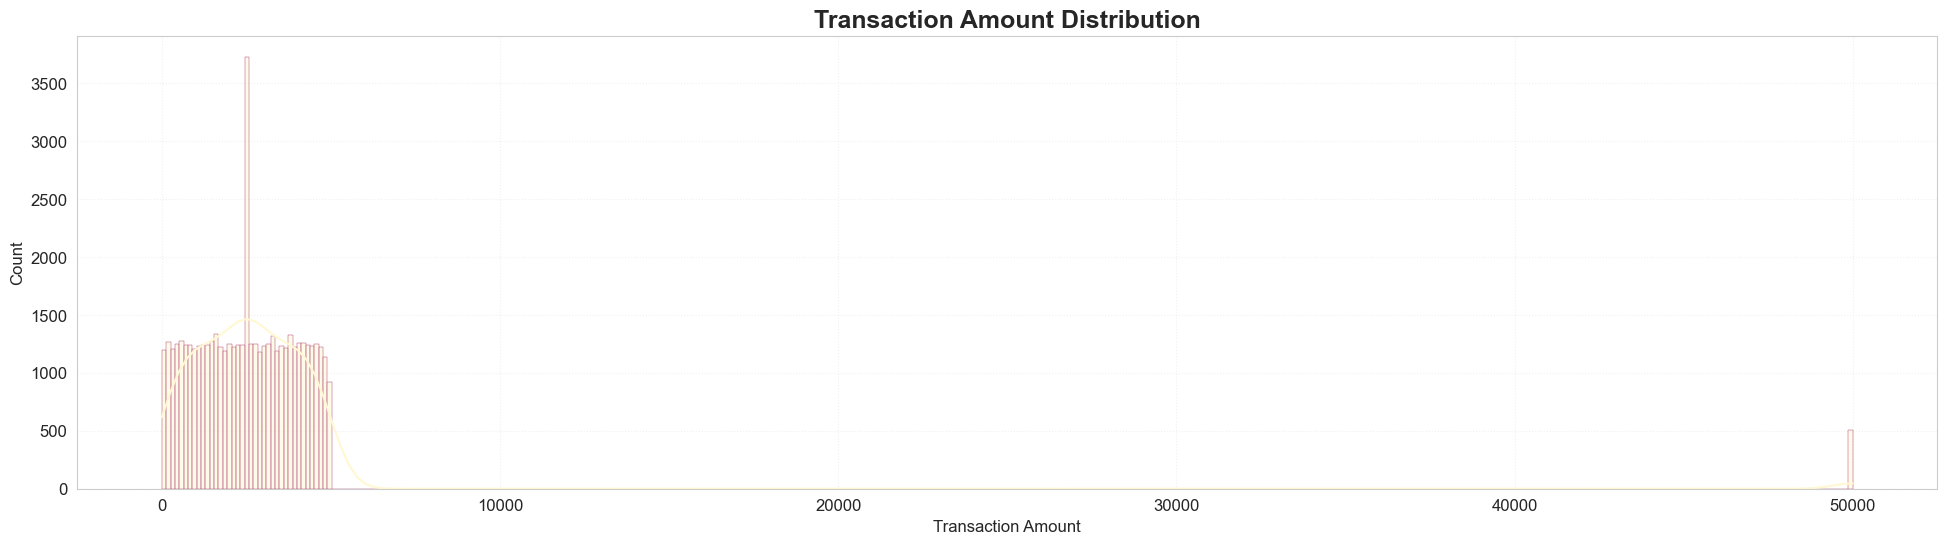

In [57]:
# Set a clean and modern style
sns.set_style("whitegrid", {"grid.color": "#f0f0f0", "grid.linestyle": ":"})  # Light grid with dotted lines
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a custom color palette
my_colors = ["#AA336A", "#FFF8D2","#1A5276", "#2874A6", "#2E86C1"]

# Set figure size and title
plt.figure(figsize=(24, 20))
# Create subplots
ax1 = plt.subplot(3, 1, 1)

# Histogram for Transaction Amount distribution
sns.histplot(df["Transaction_Amount"], color= my_colors[1], ax=ax1, kde=True, edgecolor=my_colors[0])
ax1.set_title("Transaction Amount Distribution", size=18, weight="bold")
ax1.set_ylabel("Count")
ax1.set_xlabel("Transaction Amount")

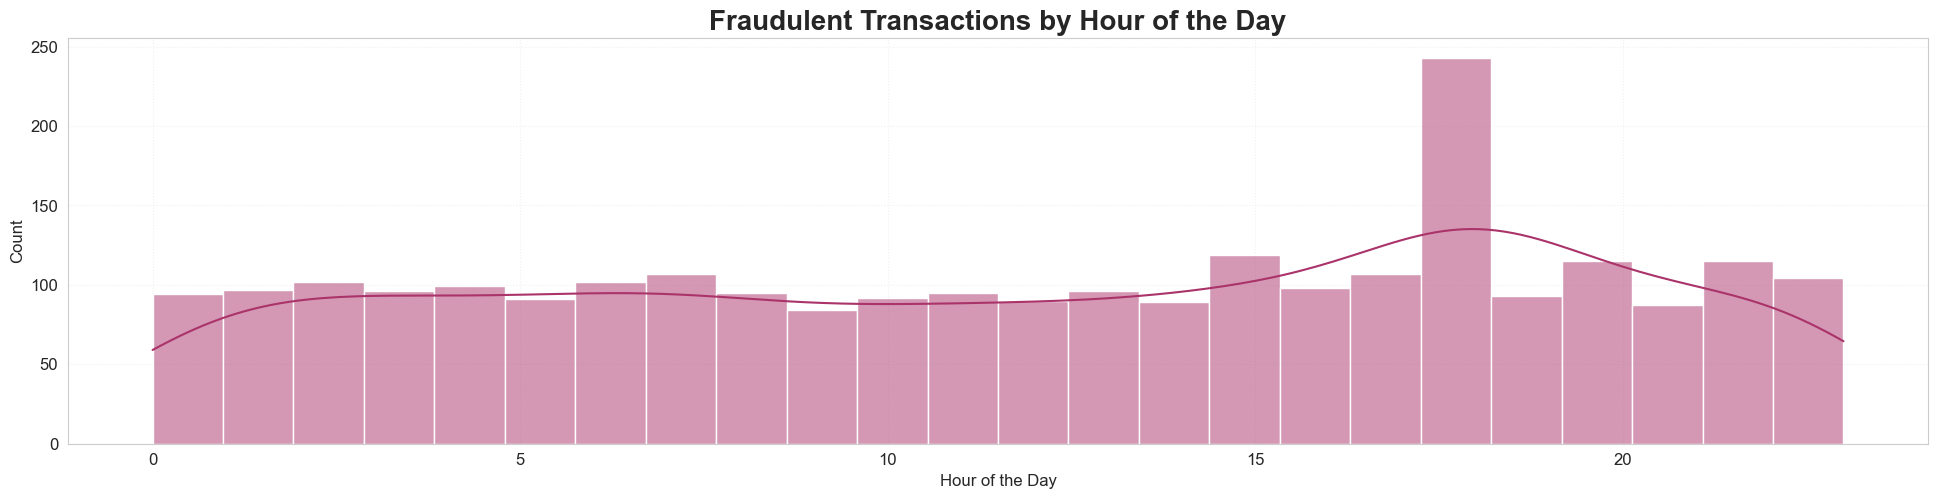

In [58]:
my_colors = ["#FFF8D2", "#AA336A","#1A5276", "#2874A6", "#2E86C1"]
plt.figure(figsize=(24, 20))
ax2 = plt.subplot(3, 1, 2) 

sns.histplot(df[df["Fraudulent"] == 1]["Time_of_Transaction"], color=my_colors[1], bins=24, kde=True, ax=ax2)
ax2.set_title("Fraudulent Transactions by Hour of the Day", size=20, weight="bold")
ax2.set_ylabel("Count")
ax2.set_xlabel("Hour of the Day")
# Adjust spacing
plt.subplots_adjust(hspace=0.4)

plt.show()

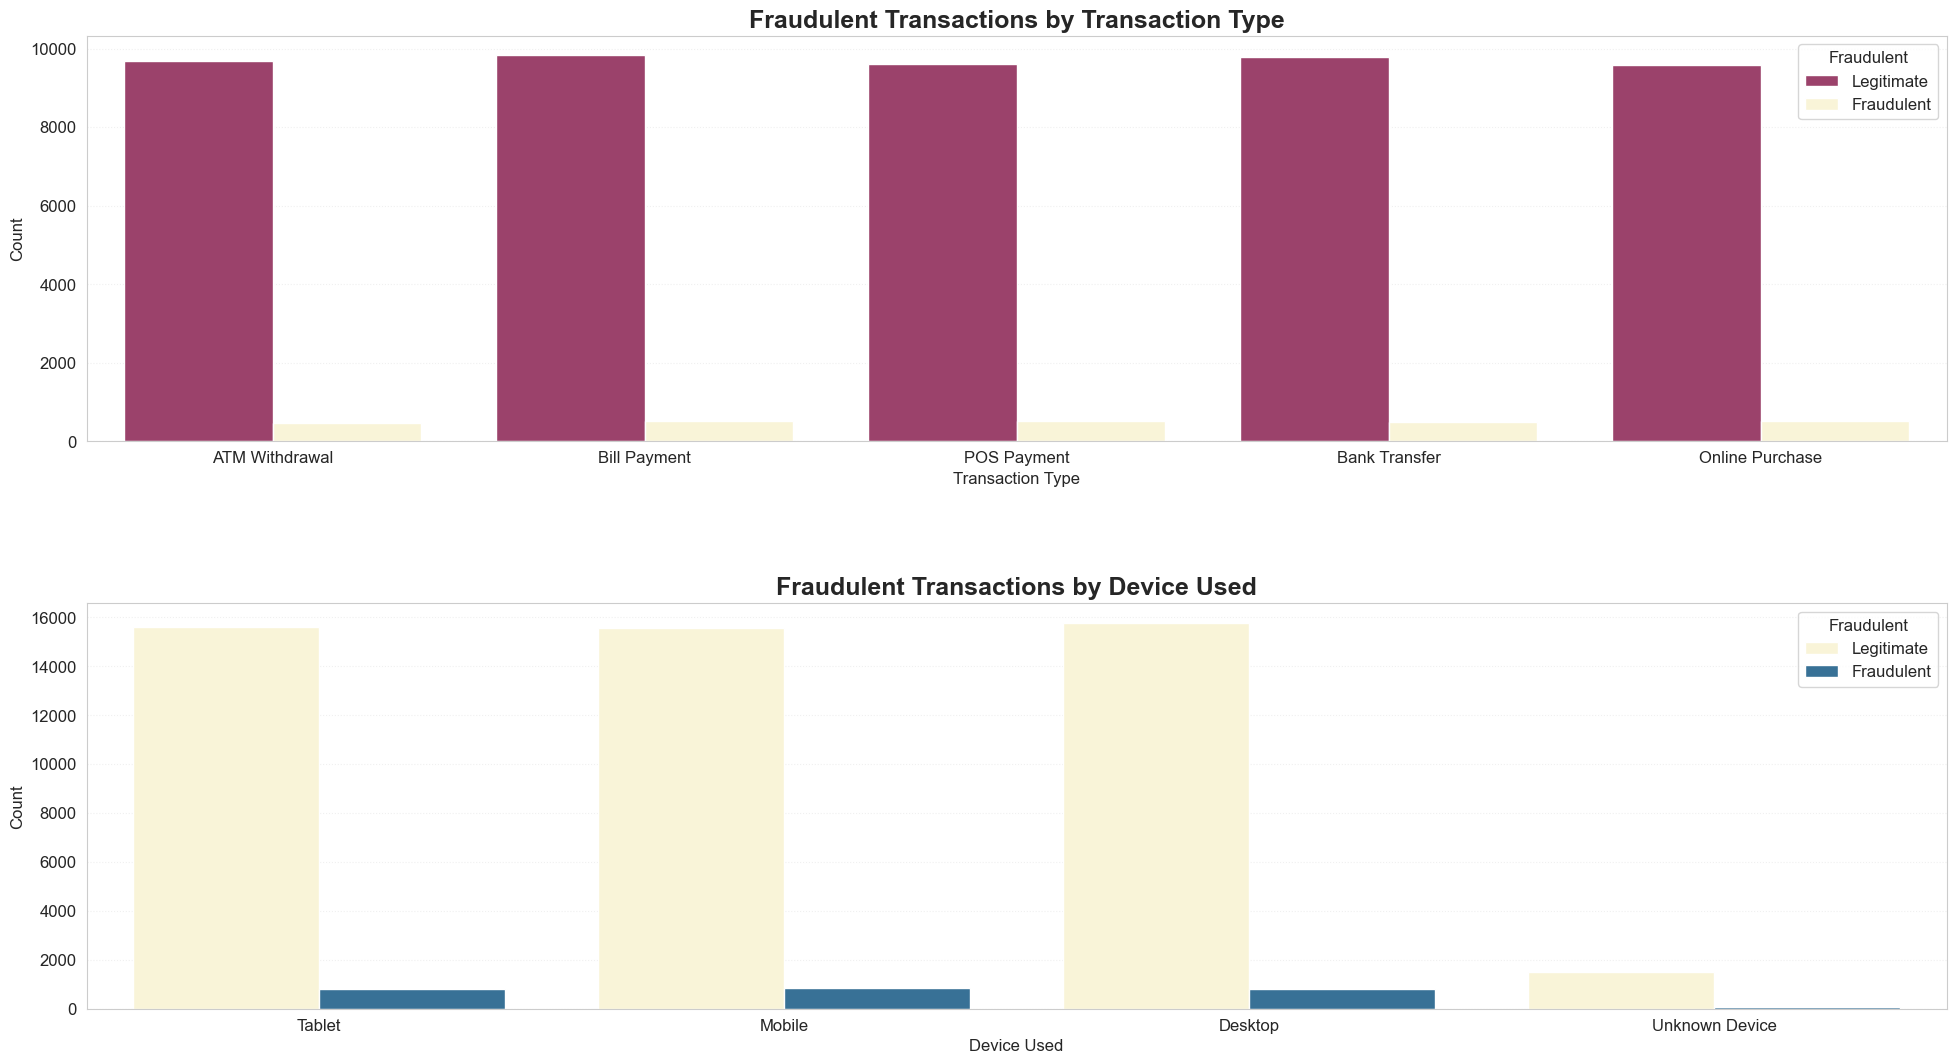

In [59]:
sns.set_style("whitegrid", {"grid.color": "#f0f0f0", "grid.linestyle": ":"})  # Light grid with dotted lines
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a contrasting color palette
my_colors = ["#AA336A", "#FFF8D2","#1A5276", "#2874A6", "#2E86C1"]

# Set figure size and title
plt.figure(figsize=(24, 20))

# Create subplots
ax1 = plt.subplot(3, 1, 1)  # First plot
ax2 = plt.subplot(3, 1, 2)  # Second plot

# Bar plot for Fraudulent Transactions by Transaction Type
sns.countplot(data=df, x="Transaction_Type", hue="Fraudulent", palette=[my_colors[0], my_colors[1]], ax=ax1)
ax1.set_title("Fraudulent Transactions by Transaction Type", size=18, weight="bold")
ax1.set_ylabel("Count")
ax1.set_xlabel("Transaction Type")
ax1.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])


# Bar plot for Fraudulent Transactions by Device Used
sns.countplot(data=df, x="Device_Used", hue="Fraudulent", palette=[my_colors[1], my_colors[3]], ax=ax2)
ax2.set_title("Fraudulent Transactions by Device Used", size=18, weight="bold")
ax2.set_ylabel("Count")
ax2.set_xlabel("Device Used")
ax2.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])

# Adjust spacing
plt.subplots_adjust(hspace=0.4)

plt.show()

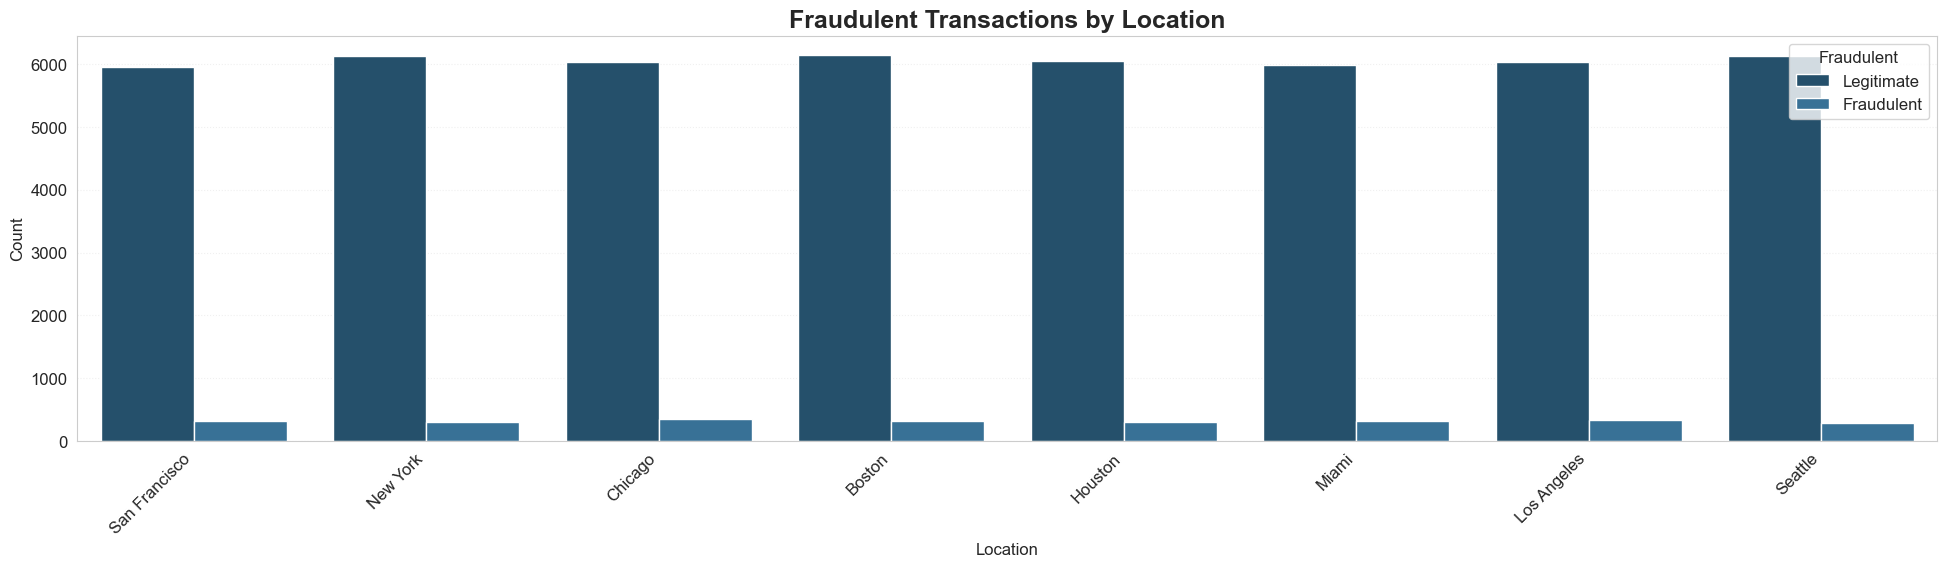

In [60]:
sns.set_style(
    "whitegrid", 
    {"grid.color": "#f0f0f0", "grid.linestyle": ":"}  # Light grid with dotted lines
)
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a contrasting color palette
my_colors = ["#AA336A", "#FFF8D2","#1A5276", "#2874A6", "#2E86C1"]

# Set figure size and title
plt.figure(figsize=(24, 20))  # Adjusted figure size (width, height)
# Third plot: Fraudulent Transactions by Location
ax3 = plt.subplot(3, 1, 1)
sns.countplot(
    data=df, 
    x="Location", 
    hue="Fraudulent", 
    palette=[my_colors[2], my_colors[3]],  # Use colors from the palette
    ax=ax3
)
ax3.set_title("Fraudulent Transactions by Location", size=18, weight="bold")
ax3.set_ylabel("Count")
ax3.set_xlabel("Location")
ax3.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")  # Use plt.xticks() to avoid the warning

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

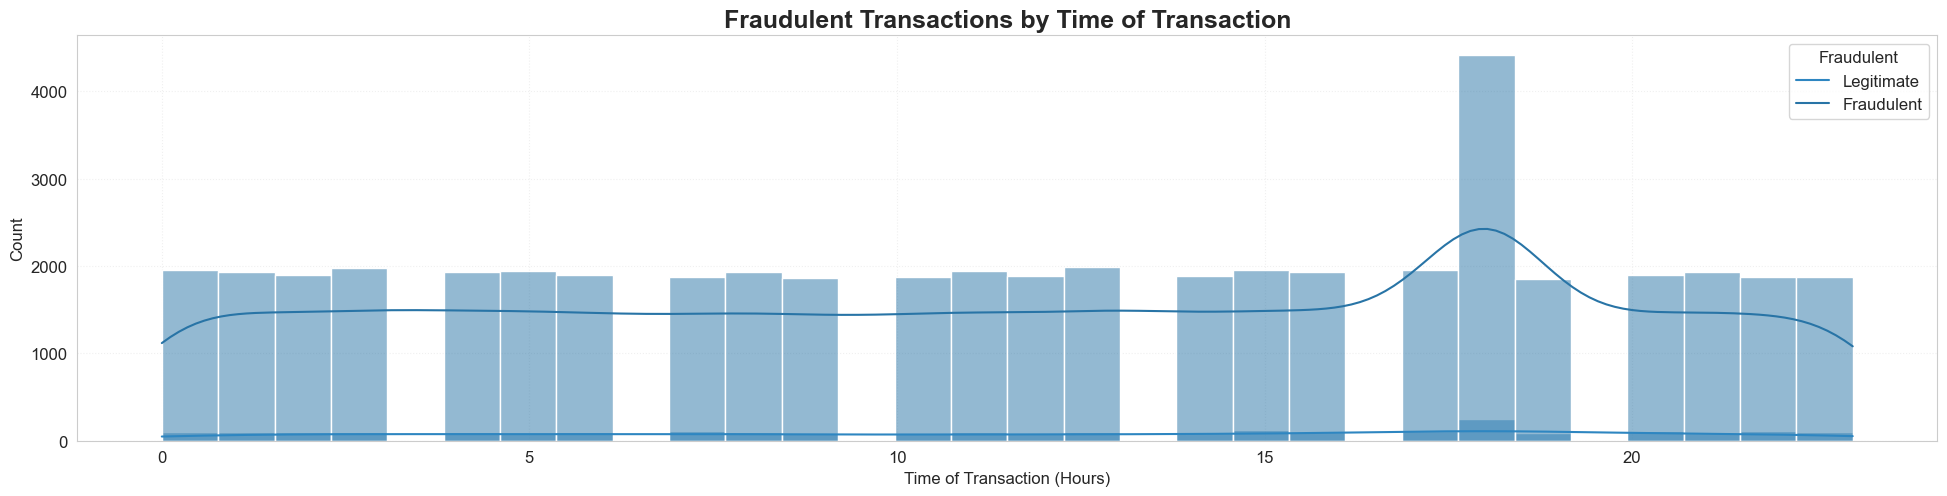

In [61]:
sns.set_style(
    "whitegrid", 
    {"grid.color": "#f0f0f0", "grid.linestyle": ":"}  # Light grid with dotted lines
)
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a contrasting color palette
my_colors = my_colors

# Set figure size and title
plt.figure(figsize=(24, 20))  # Adjusted figure size (width, height)

# Third plot: Fraudulent Transactions by Time_of_Transaction
ax3 = plt.subplot(3, 1, 1)
sns.histplot(
    data=df, 
    x="Time_of_Transaction", 
    hue="Fraudulent", 
    palette=[my_colors[3], my_colors[4]],  # Use colors from the palette
    kde=True,  # Add kernel density estimate for smoothness
    bins=30,  # Number of bins for the histogram
    ax=ax3
)
ax3.set_title("Fraudulent Transactions by Time of Transaction", size=18, weight="bold")
ax3.set_ylabel("Count")
ax3.set_xlabel("Time of Transaction (Hours)")
ax3.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

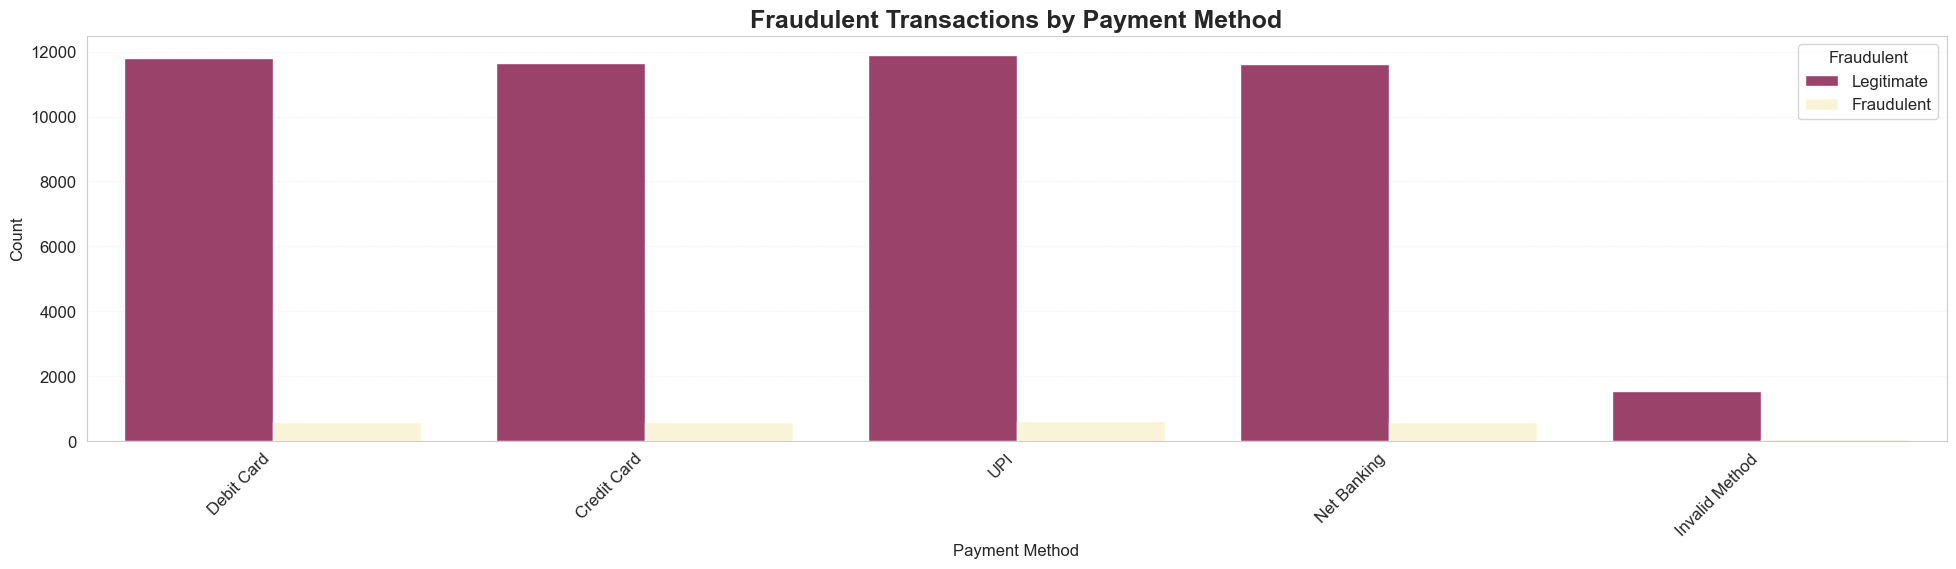

In [62]:
sns.set_style(
    "whitegrid", 
    {"grid.color": "#f0f0f0", "grid.linestyle": ":"}  # Light grid with dotted lines
)
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a contrasting color palette
my_colors = ["#AA336A", "#FFF8D2","#1A5276", "#2874A6", "#2E86C1"]

# Set figure size and title
plt.figure(figsize=(24, 20))  # Adjusted figure size (width, height)

# Third plot: Fraudulent Transactions by Payment_Method
ax3 = plt.subplot(3, 1, 1)
sns.countplot(
    data=df, 
    x="Payment_Method", 
    hue="Fraudulent", 
    palette=[my_colors[0], my_colors[1]],  # Use colors from the palette
    ax=ax3
)
ax3.set_title("Fraudulent Transactions by Payment Method", size=18, weight="bold")
ax3.set_ylabel("Count")
ax3.set_xlabel("Payment Method")
ax3.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")  # Use plt.xticks() to avoid the warning

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

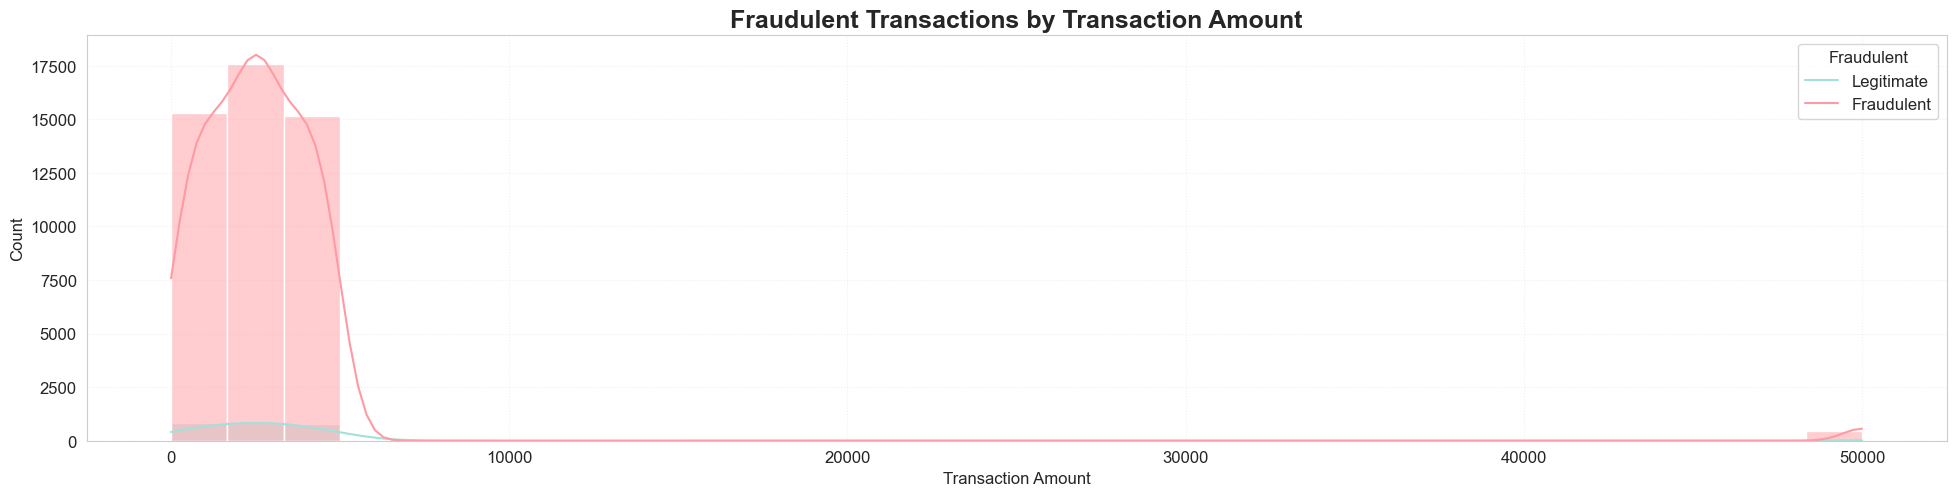

In [63]:
sns.set_style(
    "whitegrid", 
    {"grid.color": "#f0f0f0", "grid.linestyle": ":"}  # Light grid with dotted lines
)
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a contrasting color palette
my_colors = ["#FFB6C1", "#FFDAC1", "#E0BBE4", "#B5EAD7", "#C7CEEA", "#FF9AA2", "#FBE3C5", "#A2E1DB"]

# Set figure size and title
plt.figure(figsize=(24, 20))  # Adjusted figure size (width, height)

# Third plot: Fraudulent Transactions by Transaction_Amount
ax3 = plt.subplot(3, 1, 1)
sns.histplot(
    data=df, 
    x="Transaction_Amount", 
    hue="Fraudulent", 
    palette=[my_colors[5], my_colors[7]],  # Use colors from the palette
    kde=True,  # Add kernel density estimate for smoothness
    bins=30,  # Number of bins for the histogram
    ax=ax3
)
ax3.set_title("Fraudulent Transactions by Transaction Amount", size=18, weight="bold")
ax3.set_ylabel("Count")
ax3.set_xlabel("Transaction Amount")
ax3.legend(title="Fraudulent", labels=["Legitimate", "Fraudulent"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()


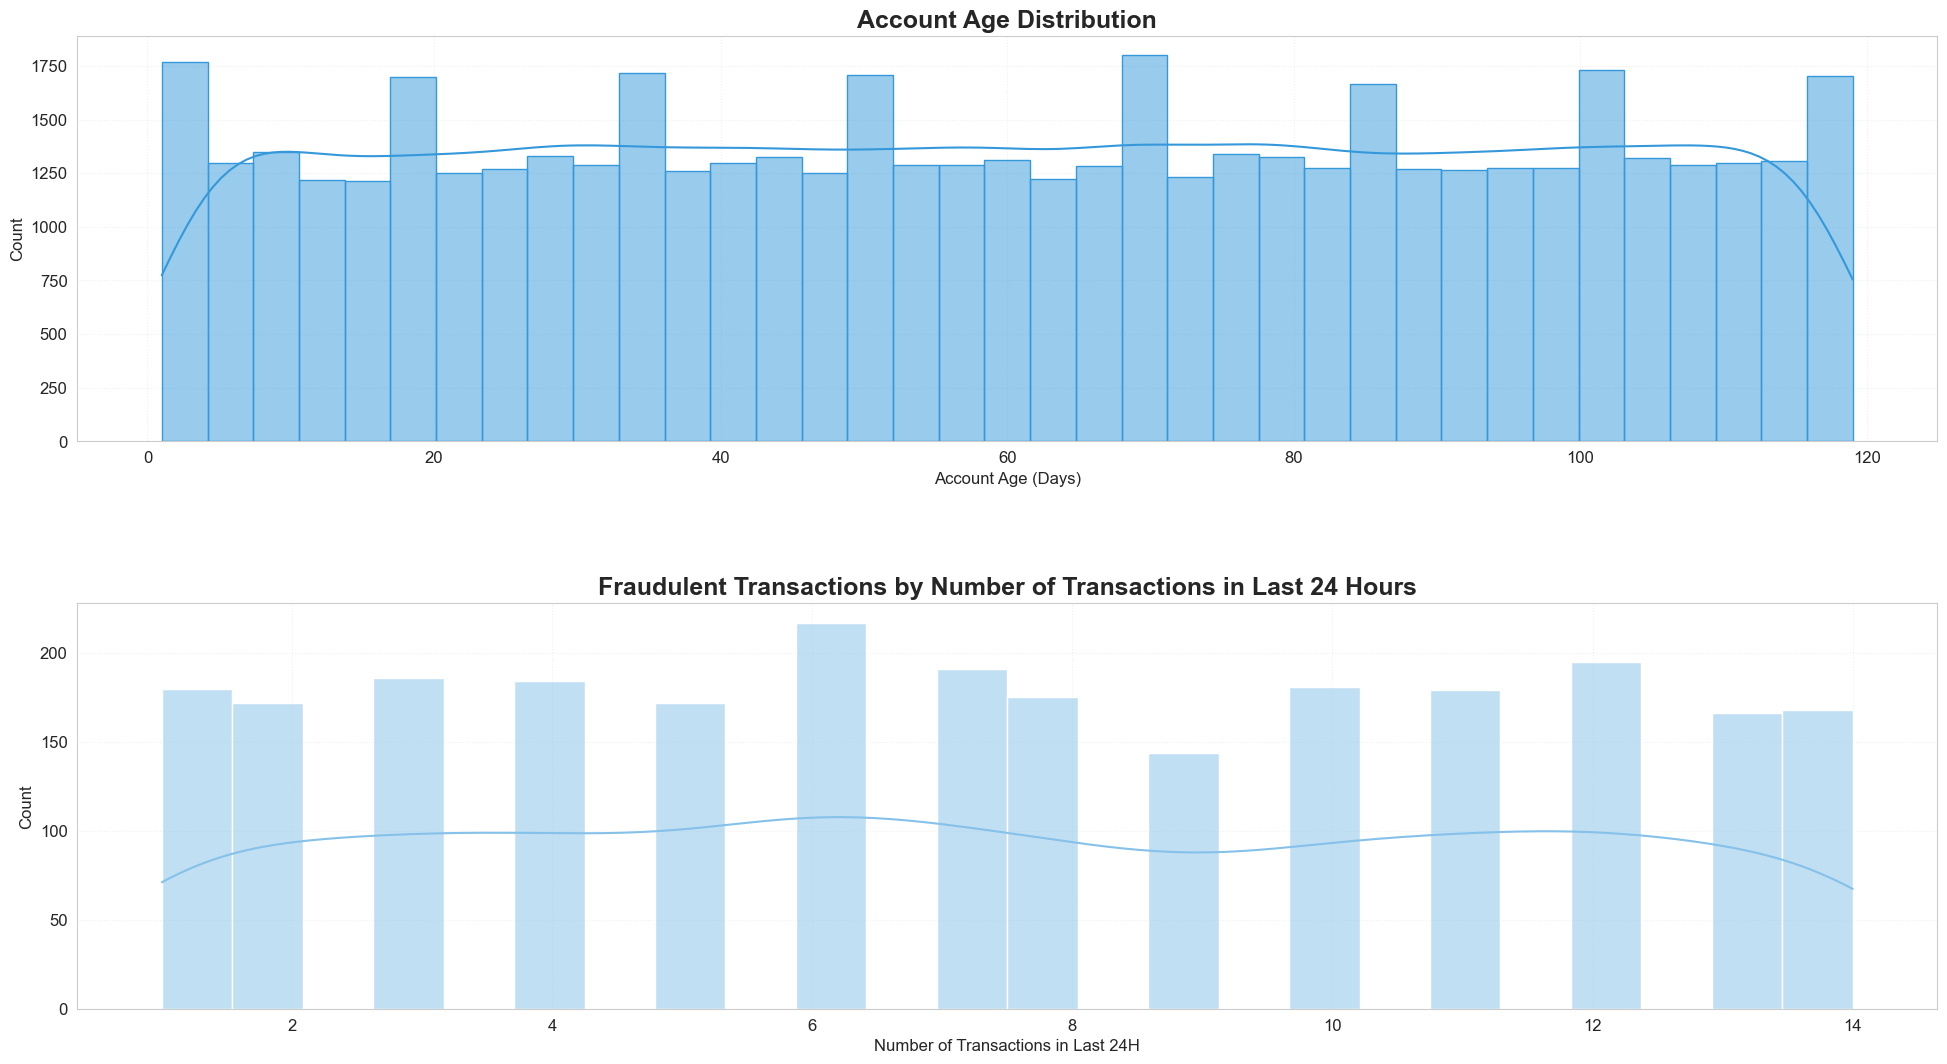

In [64]:
sns.set_style("whitegrid", {"grid.color": "#f0f0f0", "grid.linestyle": ":"})  # Light grid with dotted lines
plt.rcParams["font.family"] = "sans-serif"  # Modern sans-serif font
plt.rcParams["font.size"] = 12  # Base font size

# Define a custom color palette
my_colors = ["#1A5276", "#2874A6", "#2E86C1", "#3498DB", "#5DADE2", "#85C1E9", "#AED6F1", "#D6EAF8"]

# Set figure size and title
plt.figure(figsize=(24, 20))

# Create subplots
ax1 = plt.subplot(3, 1, 1)  # First plot
ax2 = plt.subplot(3, 1, 2)  # Second plot

# Histogram for Account_Age distribution
sns.histplot(df["Account_Age"], color=my_colors[-5], ax=ax1, kde=True, edgecolor=my_colors[-5])
ax1.set_title("Account Age Distribution", size=18, weight="bold")
ax1.set_ylabel("Count")
ax1.set_xlabel("Account Age (Days)")

# Fraudulent Transactions by Number of Transactions in Last 24H
sns.histplot(df[df["Fraudulent"] == 1]["Number_of_Transactions_Last_24H"], color=my_colors[-3], bins=24, kde=True, ax=ax2)
ax2.set_title("Fraudulent Transactions by Number of Transactions in Last 24 Hours", size=18, weight="bold")
ax2.set_ylabel("Count")
ax2.set_xlabel("Number of Transactions in Last 24H")

# Adjust spacing
plt.subplots_adjust(hspace=0.4)

plt.show()